### Explore the data-files in the repository and familiarize with pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make a map that assigns the total number of memory operations per element to a given algorithm

In [2]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,
         'arakawa':34, 'cg':42}

Now, let's read in one of the csv files (actually they are "whitespace seperated values") and compute the bandwidth from the time measurements, vector size and the memory operations

In [3]:
#read in csv file
df1 = pd.read_csv('benchmark_skl_mpi1.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']/1e6)
for name, mem in memops.items():
    df1[name] = df1['size']/1000*mem/df1[name]
dfr = df1[['n','Nx','Ny','size']+list(memops.keys())]
dfr

,n,Nx,Ny,size,cg,scal,dot,dy,dx,pointwiseDot,arakawa,axpby
0,2,144,144,0.663552,126.542938,314.478876,56.162541,39.256309,97.585482,524.460662,138.435948,416.429966
1,2,288,288,2.654208,227.802475,1203.520498,115.879737,117.065735,183.928301,1633.536364,308.217740,1272.291559
2,2,384,384,4.718592,248.862136,1953.722704,137.448463,143.189693,198.315441,1985.410174,367.836204,2088.414692
3,2,576,576,10.616832,312.356009,2892.511146,140.424998,189.350724,207.967927,1293.980788,359.265776,2698.805765
4,2,768,768,18.874368,244.174862,3349.488554,157.659528,106.536537,86.322418,595.559361,290.893499,541.433391
5,2,1152,1152,42.467328,229.203567,2239.808441,165.690918,202.180442,215.446248,276.474300,213.885422,880.699461
6,2,1536,1536,75.497472,204.466945,931.900734,168.677207,189.098239,192.213127,237.265454,192.737310,304.539493
7,2,1920,1920,117.964800,201.889164,703.048146,168.949551,209.209378,200.333082,221.922586,197.670966,240.623360
8,3,144,144,1.492992,177.587140,122.521511,101.115254,69.811217,185.855025,1522.997591,195.680707,1046.585086
9,3,288,288,5.971968,230.378838,2232.465501,156.292713,119.757916,177.157164,2118.846195,286.421687,2253.890359


We want to aggregate the results with the same input parameters n, Nx, Ny

In [4]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','size'])

In [5]:
#dfr['axpby']

Here, we compute the efficiency of the operations

In [6]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 2048 2048 
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [7]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [8]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
efficiency.iloc[0:20]

,n,Nx,Ny,size,cg,scal,dot,dy,dx,pointwiseDot,arakawa,axpby,cg,scal,dot,dy,dx,pointwiseDot,arakawa,axpby
,,,,,eff,eff,eff,eff,eff,eff,eff,eff,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err
0,2,144,144,0.66,0.61,1.44,0.25,0.20,0.42,2.88,0.65,2.19,2.37e-02,0.03,2.10e-02,8.87e-03,7.98e-02,0.30,1.38e-02,0.13
8,3,144,144,1.49,0.80,3.16,0.46,0.32,0.84,6.83,0.89,5.03,5.07e-03,0.92,6.79e-03,4.47e-03,4.62e-02,0.18,5.07e-03,0.14
1,2,288,288,2.65,1.10,5.53,0.57,0.54,0.85,7.77,1.42,6.70,4.95e-02,0.06,2.50e-02,6.81e-03,3.30e-02,0.20,1.07e-02,0.46
16,4,144,144,2.65,0.76,5.54,0.55,0.33,0.65,7.69,0.92,6.52,1.44e-02,0.09,5.95e-02,1.88e-03,2.42e-02,0.23,1.11e-02,1.10
24,5,144,144,4.15,0.74,7.59,0.66,0.32,0.63,11.24,0.80,10.87,5.63e-03,0.13,2.57e-02,1.67e-03,2.75e-02,0.18,3.84e-03,0.12
2,2,384,384,4.72,1.22,8.84,0.69,0.65,0.91,9.19,1.68,9.51,5.82e-02,0.20,3.64e-02,3.16e-03,1.66e-02,0.34,1.32e-02,0.27
9,3,288,288,5.97,1.05,9.92,0.70,0.55,0.80,9.73,1.31,10.17,1.95e-02,0.15,2.35e-02,3.11e-03,1.94e-02,0.49,1.32e-02,0.49
3,2,576,576,10.62,1.45,12.80,0.67,0.85,0.94,5.94,1.68,11.92,2.66e-02,0.67,2.72e-02,1.43e-02,2.48e-02,0.97,2.77e-02,0.50
17,4,288,288,10.62,1.06,12.91,0.68,0.49,0.73,6.06,1.07,12.25,8.21e-02,0.18,4.33e-02,2.67e-03,1.08e-02,0.82,1.05e-02,0.42


Let us try and make our first plot

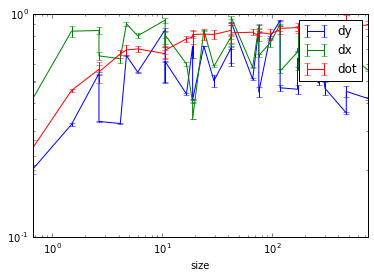

In [9]:
fig=plt.figure()
#print(efficiency)
toPlot=efficiency['dy'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err')
toPlot=efficiency['dx'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
toPlot=efficiency['dot'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
plt.yscale('log')
ax.legend(['dy','dx','dot'])

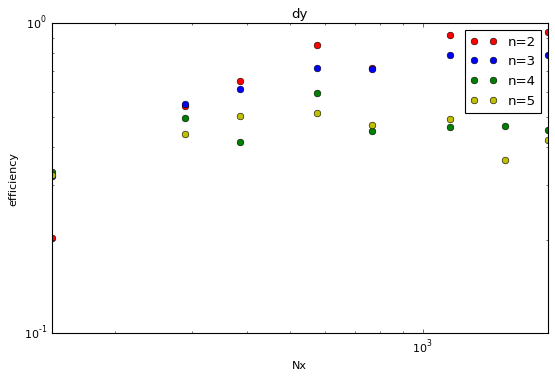

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plotlist = [('dy','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
efficiency[efficiency['n']==2].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[0])
efficiency[efficiency['n']==3].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency[efficiency['n']==4].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
efficiency[efficiency['n']==5].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[3])
#plt.loglog()
plt.title(plotlist[0][0])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('efficiency')
plt.xlabel('Nx')
plt.legend(['n=2','n=3','n=4','n=5'])
plt.show()
#base_bandwidth